In [69]:
import cv2
import matplotlib.pyplot as plt
import shutil
import numpy as np

from os import listdir, path, makedirs
from os.path import isfile, join
from sklearn.metrics import accuracy_score

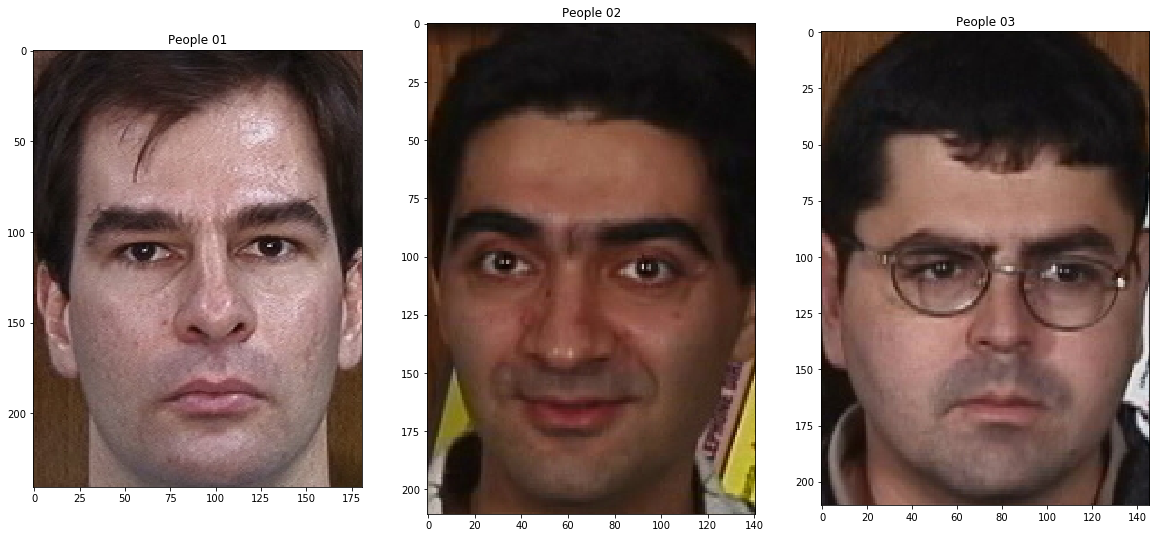

In [2]:
img_face_1 = cv2.imread('images/cropped_faces/s01_01.jpg')
img_face_1 = cv2.cvtColor(img_face_1, cv2.COLOR_BGR2RGB)

img_face_2 = cv2.imread('images/cropped_faces/s02_01.jpg')
img_face_2 = cv2.cvtColor(img_face_2, cv2.COLOR_BGR2RGB)

img_face_3 = cv2.imread('images/cropped_faces/s03_03.jpg')
img_face_3 = cv2.cvtColor(img_face_3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))

plt.subplot(131)
plt.title('People 01')
plt.imshow(img_face_1)

plt.subplot(132)
plt.title('People 02')
plt.imshow(img_face_2)

plt.subplot(133)
plt.title('People 03')
plt.imshow(img_face_3)

plt.show()

In [3]:
img_face_1.shape

(241, 181, 3)

In [4]:
img_face_2.shape

(211, 141, 3)

In [5]:
img_face_3.shape

(211, 146, 3)

In [6]:
faces_directory = "images/cropped_faces/"
list_arq_faces = [f for f in listdir(faces_directory) if isfile(join(faces_directory, f))]

In [7]:
# separating images for training and testing

faces_path_train = "images/train/"
faces_path_test = "images/test/"

if not path.exists(faces_path_train):
    makedirs(faces_path_train)
    
if not path.exists(faces_path_test):
    makedirs(faces_path_test)
    
for arq in list_arq_faces:
    people = arq[1:3]
    number = arq[4:6]
    
    if int(number) <= 10:
        shutil.copyfile(faces_directory + arq, faces_path_train + arq)
    else:
        shutil.copyfile(faces_directory + arq, faces_path_test + arq)

In [29]:
def standardize_image(path_img):
    img = cv2.imread(path_img, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (200, 200), interpolation = cv2.INTER_LANCZOS4)    
    return img

In [13]:
list_faces_train = [f for f in listdir(faces_path_train) if isfile(join(faces_path_train, f))]
list_faces_test = [f for f in listdir(faces_path_test) if isfile(join(faces_path_test, f))]

In [20]:
list_faces_train[0]

's43_07.jpg'

In [15]:
list_faces_test[0]

's21_11.jpg'

In [31]:
data_train, people = [], []

for i, arq in enumerate(list_faces_train):
    img_path = faces_path_train + arq
    img = standardize_image(img_path)
    data_train.append(img)
    subject = arq[1:3]
    people.append(int(subject))

In [32]:
len(data_train)

500

In [33]:
len(people)

500

In [34]:
data_test, people_test = [], []

for i, arq in enumerate(list_faces_test):
    img_path = faces_path_test + arq
    img = standardize_image(img_path)
    data_test.append(img)
    subject = arq[1:3]
    people_test.append(int(subject))

In [35]:
len(data_test)

250

In [36]:
len(people_test)

250

Text(0.5, 1.0, '43')

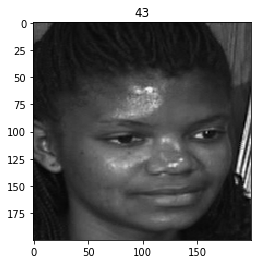

In [37]:
plt.imshow(data_train[0], cmap = "gray")
plt.title(people[0])

Text(0.5, 1.0, '21')

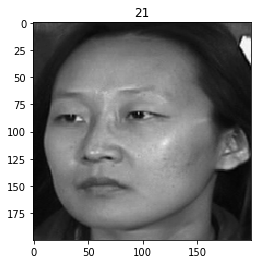

In [38]:
plt.imshow(data_test[0], cmap = "gray")
plt.title(people_test[0])

In [42]:
# training model with classifier Eingenface
people = np.asarray(people, dtype = np.int32)
people_test = np.asarray(people_test, dtype = np.int32)

model_eingenfaces = cv2.face.EigenFaceRecognizer_create()
model_eingenfaces.train(data_train, people)

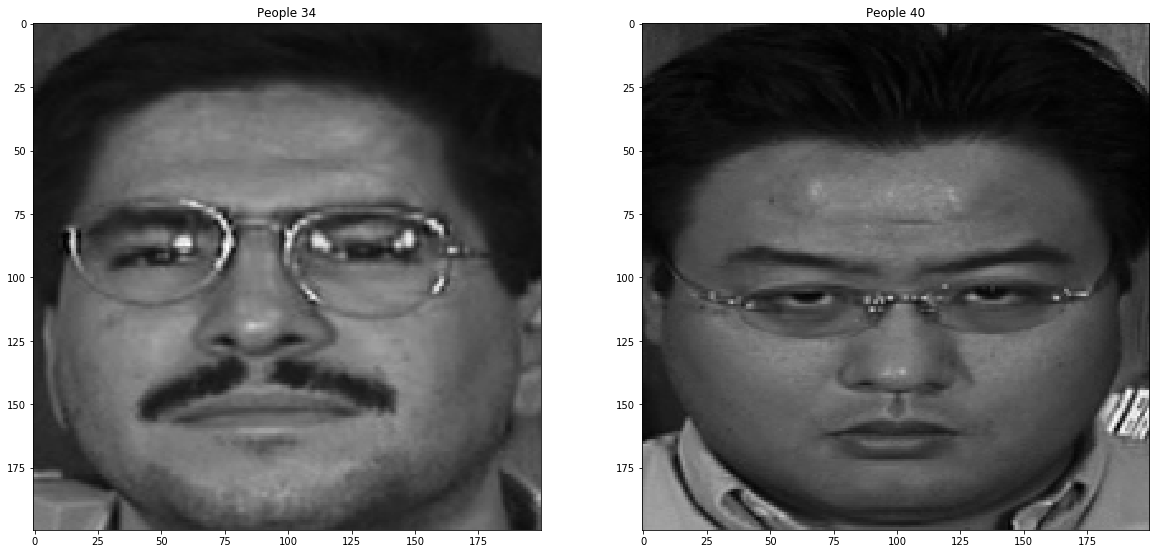

In [44]:
plt.figure(figsize = (20, 10))

plt.subplot(121)
plt.title("People " + str(people_test[6]))
plt.imshow(data_test[6], cmap = "gray")

plt.subplot(122)
plt.title("People " + str(people_test[7]))
plt.imshow(data_test[7], cmap = "gray")

plt.show()

In [48]:
predict = model_eingenfaces.predict(data_test[6])
predict

(35, 5176.141848446953)

In [49]:
predict = model_eingenfaces.predict(data_test[7])
predict

(4, 5008.427127126945)

In [50]:
# training model with classifier Fisherfaces
model_fisherfaces = cv2.face.FisherFaceRecognizer_create()
model_fisherfaces.train(data_train, people)

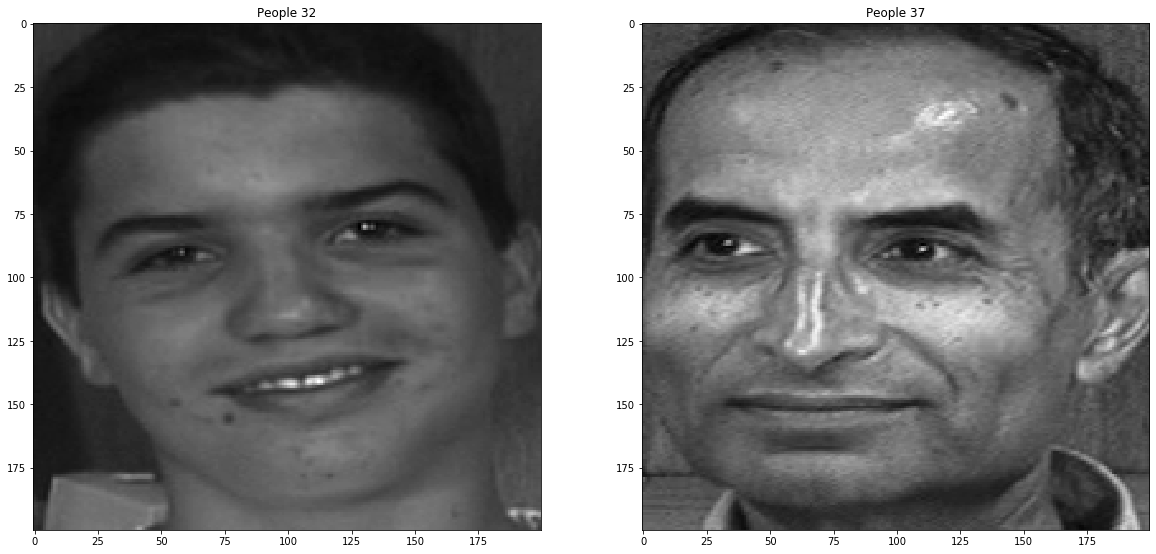

In [51]:
plt.figure(figsize = (20, 10))

plt.subplot(121)
plt.title("People " + str(people_test[13]))
plt.imshow(data_test[13], cmap = "gray")

plt.subplot(122)
plt.title("People " + str(people_test[19]))
plt.imshow(data_test[19], cmap = "gray")

plt.show()

In [52]:
predict = model_fisherfaces.predict(data_test[13])
predict

(32, 736.3170560902813)

In [53]:
predict = model_fisherfaces.predict(data_test[19])
predict

(25, 1108.0416794966252)

In [54]:
# training model with classifier LBPH
model_lbph = cv2.face.LBPHFaceRecognizer_create()
model_lbph.train(data_train, people)

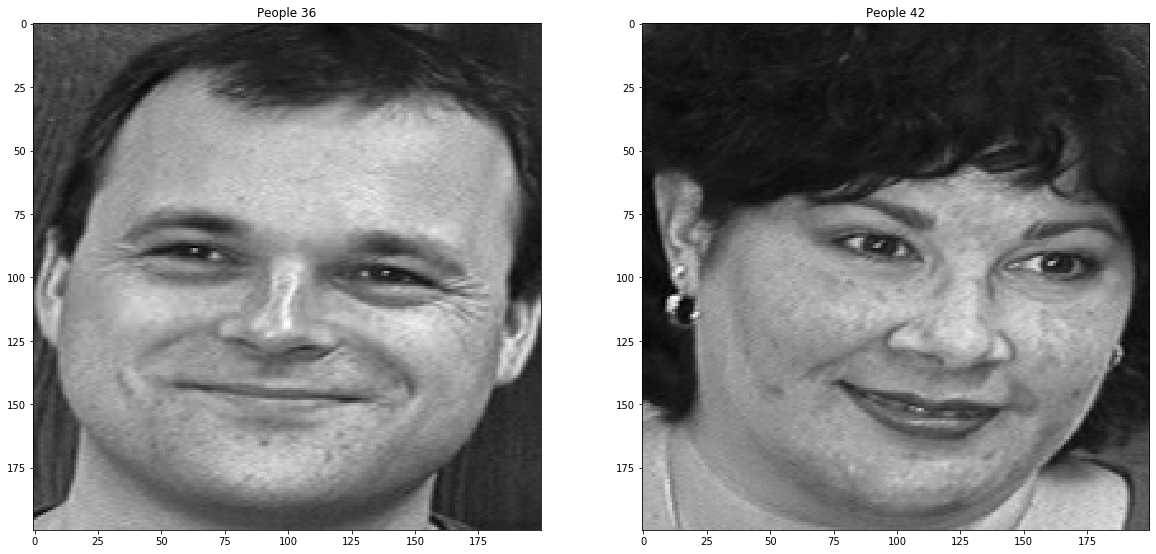

In [55]:
plt.figure(figsize = (20, 10))

plt.subplot(121)
plt.title("People " + str(people_test[21]))
plt.imshow(data_test[21], cmap = "gray")

plt.subplot(122)
plt.title("People " + str(people_test[27]))
plt.imshow(data_test[27], cmap = "gray")

plt.show()

In [56]:
predict = model_lbph.predict(data_test[21])
predict

(36, 40.301309114514666)

In [57]:
predict = model_lbph.predict(data_test[27])
predict

(42, 40.59449538330232)

In [66]:
# accuracy classifier Eingenface
y_pred_eigenfaces = []

for item in data_test:
    y_pred_eigenfaces.append(model_eingenfaces.predict(item)[0])
    
accuracy_eigenfaces = accuracy_score(people_test, y_pred_eigenfaces)
accuracy_eigenfaces

0.724

In [67]:
# accuracy classifier Fisherfaces
y_pred_fisherfaces = []

for item in data_test:
    y_pred_fisherfaces.append(model_fisherfaces.predict(item)[0])
    
accuracy_fisherfaces = accuracy_score(people_test, y_pred_fisherfaces)
accuracy_fisherfaces

0.52

In [68]:
# accuracy classifier LBPH
y_pred_lbph = []

for item in data_test:
    y_pred_lbph.append(model_lbph.predict(item)[0])
    
accuracy_lbph = accuracy_score(people_test, y_pred_lbph)
accuracy_lbph

0.792